![COUR_IPO.png](attachment:COUR_IPO.png)

# Welcome to the Data Science Coding Challange!

Test your skills in a real-world coding challenge. Coding Challenges provide CS & DS Coding Competitions with Prizes and achievement badges!

CS & DS learners want to be challenged as a way to evaluate if they’re job ready. So, why not create fun challenges and give winners something truly valuable such as complimentary access to select Data Science courses, or the ability to receive an achievement badge on their Coursera Skills Profile - highlighting their performance to recruiters.

## Introduction

In this challenge, you'll get the opportunity to tackle one of the most industry-relevant maching learning problems with a unique dataset that will put your modeling skills to the test. Subscription services are leveraged by companies across many industries, from fitness to video streaming to retail. One of the primary objectives of companies with subscription services is to decrease churn and ensure that users are retained as subscribers. In order to do this efficiently and systematically, many companies employ machine learning to predict which users are at the highest risk of churn, so that proper interventions can be effectively deployed to the right audience.

In this challenge, we will be tackling the churn prediction problem on a very unique and interesting group of subscribers on a video streaming service!

Imagine that you are a new data scientist at this video streaming company and you are tasked with building a model that can predict which existing subscribers will continue their subscriptions for another month. We have provided a dataset that is a sample of subscriptions that were initiated in 2021, all snapshotted at a particular date before the subscription was cancelled. Subscription cancellation can happen for a multitude of reasons, including:
* the customer completes all content they were interested in, and no longer need the subscription
* the customer finds themselves to be too busy and cancels their subscription until a later time
* the customer determines that the streaming service is not the best fit for them, so they cancel and look for something better suited

Regardless the reason, this video streaming company has a vested interest in understanding the likelihood of each individual customer to churn in their subscription so that resources can be allocated appropriately to support customers. In this challenge, you will use your machine learning toolkit to do just that!

## Understanding the Datasets

### Train vs. Test
In this competition, you’ll gain access to two datasets that are samples of past subscriptions of a video streaming platform that contain information about the customer, the customers streaming preferences, and their activity in the subscription thus far. One dataset is titled `train.csv` and the other is titled `test.csv`.

`train.csv` contains 70% of the overall sample (243,787 subscriptions to be exact) and importantly, will reveal whether or not the subscription was continued into the next month (the “ground truth”).

The `test.csv` dataset contains the exact same information about the remaining segment of the overall sample (104,480 subscriptions to be exact), but does not disclose the “ground truth” for each subscription. It’s your job to predict this outcome!

Using the patterns you find in the `train.csv` data, predict whether the subscriptions in `test.csv` will be continued for another month, or not.

### Dataset descriptions
Both `train.csv` and `test.csv` contain one row for each unique subscription. For each subscription, a single observation (`CustomerID`) is included during which the subscription was active.

In addition to this identifier column, the `train.csv` dataset also contains the target label for the task, a binary column `Churn`.

Besides that column, both datasets have an identical set of features that can be used to train your model to make predictions. Below you can see descriptions of each feature. Familiarize yourself with them so that you can harness them most effectively for this machine learning task!

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
data_descriptions = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Churn Prediction/data_descriptions.csv')
pd.set_option('display.max_colwidth', None)
data_descriptions

,Column_name,Column_type,Data_type,Description
0,AccountAge,Feature,integer,The age of the user's account in months.
1,MonthlyCharges,Feature,float,The amount charged to the user on a monthly basis.
2,TotalCharges,Feature,float,The total charges incurred by the user over the account's lifetime.
3,SubscriptionType,Feature,object,"The type of subscription chosen by the user (Basic, Standard, or Premium)."
4,PaymentMethod,Feature,string,The method of payment used by the user.
5,PaperlessBilling,Feature,string,Indicates whether the user has opted for paperless billing (Yes or No).
6,ContentType,Feature,string,"The type of content preferred by the user (Movies, TV Shows, or Both)."
7,MultiDeviceAccess,Feature,string,Indicates whether the user has access to the service on multiple devices (Yes or No).
8,DeviceRegistered,Feature,string,"The type of device registered by the user (TV, Mobile, Tablet, or Computer)."
9,ViewingHoursPerWeek,Feature,float,The number of hours the user spends watching content per week.


## Set Up Environment

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Thu Aug 22 22:58:00 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 54.8 gigabytes of available RAM

You are using a high-RAM runtime!


In [3]:
# Data packages
import pandas as pd
import numpy as np

# Machine Learning / Classification packages
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.utils.class_weight import compute_class_weight
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.metrics import AUC
from tensorflow.keras.callbacks import EarlyStopping


# Visualization Packages
from matplotlib import pyplot as plt
import seaborn as sns

# Other
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


## **How to Submit your Predictions to Coursera**
Submission Format:

In this notebook you should follow the steps below to explore the data, train a model using the data in `train.csv`, and then score your model using the data in `test.csv`. Your final submission should be a dataframe (call it `prediction_df` with two columns and exactly 104,480 rows (plus a header row). The first column should be `CustomerID` so that we know which prediction belongs to which observation. The second column should be called `predicted_probability` and should be a numeric column representing the __likellihood that the subscription will churn__.

Your submission will show an error if you have extra columns (beyond `CustomerID` and `predicted_probability`) or extra rows. The order of the rows does not matter.

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `CustomerID` and `predicted_probability`!

To determine your final score, we will compare your `predicted_probability` predictions to the source of truth labels for the observations in `test.csv` and calculate the [ROC AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html). We choose this metric because we not only want to be able to predict which subscriptions will be retained, but also want a well-calibrated likelihood score that can be used to target interventions and support most accurately.

## **Load the Data**
---
Let's start by loading the dataset `train.csv` into a dataframe `train_df`, and `test.csv` into a dataframe `test_df` and display the shape of the dataframes.



In [5]:
train_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Churn Prediction/train.csv")
print('train_df Shape:', train_df.shape)
train_df.set_index('CustomerID',inplace=True)
train_df.head()

train_df Shape: (243787, 21)


,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,Churn
CustomerID,,,,,,,,,,,,,,,,,,,,
CB6SXPNVZA,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,63.531377,10,Sci-Fi,2.176498,4,Male,3,No,No,0
S7R2G87O09,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,25.725595,18,Action,3.478632,8,Male,23,No,Yes,0
EASDC20BDT,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,57.364061,23,Fantasy,4.238824,6,Male,1,Yes,Yes,0
NPF69NT69N,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,131.537507,30,Drama,4.276013,2,Male,24,Yes,Yes,0
4LGYPK7VOL,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,45.356653,20,Comedy,3.616170,4,Female,0,No,No,0


In [6]:
test_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Churn Prediction/test.csv")
print('test_df Shape:', test_df.shape)
test_df.set_index('CustomerID',inplace=True)
test_df.head()

test_df Shape: (104480, 20)


,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled
CustomerID,,,,,,,,,,,,,,,,,,,
O1W6BHP6RM,38,17.869374,679.036195,Premium,Mailed check,No,TV Shows,No,TV,29.126308,122.274031,42,Comedy,3.522724,2,Male,23,No,No
LFR4X92X8H,77,9.912854,763.289768,Basic,Electronic check,Yes,TV Shows,No,TV,36.873729,57.093319,43,Action,2.021545,2,Female,22,Yes,No
QM5GBIYODA,5,15.019011,75.095057,Standard,Bank transfer,No,TV Shows,Yes,Computer,7.601729,140.414001,14,Sci-Fi,4.806126,2,Female,22,No,Yes
D9RXTK2K9F,88,15.357406,1351.451692,Standard,Electronic check,No,Both,Yes,Tablet,35.586430,177.002419,14,Comedy,4.943900,0,Female,23,Yes,Yes
ENTCCHR1LR,91,12.406033,1128.949004,Standard,Credit card,Yes,TV Shows,Yes,Tablet,23.503651,70.308376,6,Drama,2.846880,6,Female,0,No,No


## **Exploratory Data Analysis**
----
 **Summary**
    
  1.   No missing value and duplicate columns in `train_df`
  2.   Imbalanced dataset with proportion of `"Churn"` is **82 : 18**
  3.   Generates a histogram to visualize the distribution of a feature there're almost normal distibution except `"Total Charge"` is left skew
  4.   `"Total Charge"` is also multicollinearity columns which highly correlation with `"AccountAge"` and `"MonthlyCharges"`







#### *Inspection Missing Value and Duplicate Rows*

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243787 entries, CB6SXPNVZA to A6IN701VRY
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   AccountAge                243787 non-null  int64  
 1   MonthlyCharges            243787 non-null  float64
 2   TotalCharges              243787 non-null  float64
 3   SubscriptionType          243787 non-null  object 
 4   PaymentMethod             243787 non-null  object 
 5   PaperlessBilling          243787 non-null  object 
 6   ContentType               243787 non-null  object 
 7   MultiDeviceAccess         243787 non-null  object 
 8   DeviceRegistered          243787 non-null  object 
 9   ViewingHoursPerWeek       243787 non-null  float64
 10  AverageViewingDuration    243787 non-null  float64
 11  ContentDownloadsPerMonth  243787 non-null  int64  
 12  GenrePreference           243787 non-null  object 
 13  UserRating                243787 non

In [ ]:
print(f'Missing Values : {train_df.isnull().sum().sum()}')
print(f'Customers Duplicated : {train_df.duplicated().sum()}')

Missing Values : 0
Customers Duplicated : 0


In [ ]:
train_df.describe()

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,Churn
count,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000
mean,60.083758,12.490695,750.741017,20.502179,92.264061,24.503513,3.002713,4.504186,12.018508,0.181232
std,34.285143,4.327615,523.073273,11.243753,50.505243,14.421174,1.155259,2.872548,7.193034,0.385211
min,1.000000,4.990062,4.991154,1.000065,5.000547,0.000000,1.000007,0.000000,0.000000,0.000000
25%,30.000000,8.738543,329.147027,10.763953,48.382395,12.000000,2.000853,2.000000,6.000000,0.000000
50%,60.000000,12.495555,649.878487,20.523116,92.249992,24.000000,3.002261,4.000000,12.000000,0.000000
75%,90.000000,16.238160,1089.317362,30.219396,135.908048,37.000000,4.002157,7.000000,18.000000,0.000000
max,119.000000,19.989957,2378.723844,39.999723,179.999275,49.000000,4.999989,9.000000,24.000000,1.000000



  After inspection, traning data is without missing value and duplicate columns

#### *Proportion of Costomer Churned*

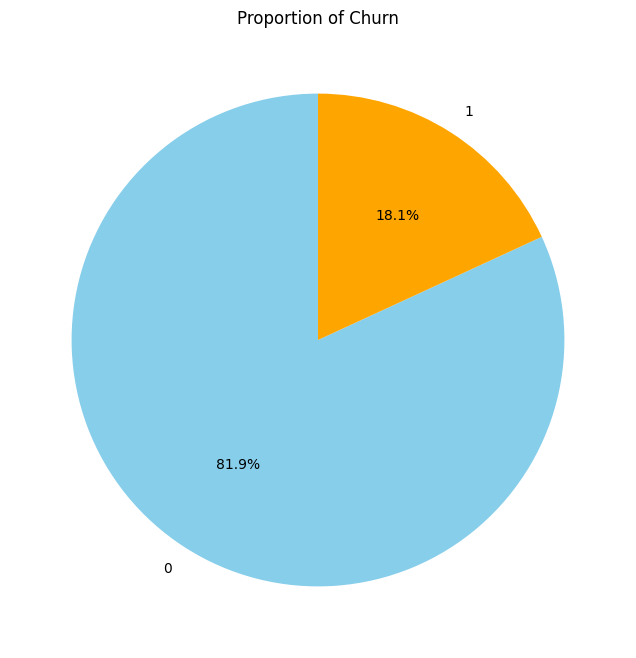

In [ ]:
import matplotlib.pyplot as plt

class_distribution = train_df['Churn'].value_counts(normalize=True)

plt.figure(figsize=(8, 8))
plt.pie(class_distribution, labels=class_distribution.index, autopct='%1.1f%%', startangle=90, colors=['skyblue','orange'])
plt.title('Proportion of Churn')
plt.show()

There're Imbalance data with proportion of `"Churn"` customer is 82:18




In [7]:
numeric_col = []
category_col = []

for col in train_df.columns:
    if (train_df[col].dtype != 'O') & (col != 'Churn'):
        numeric_col.append(col)

    elif (train_df[col].dtype == 'O'):
        category_col.append(col)

print(f'Numeric Features : \n{numeric_col}')
print(f'\nCategory Features : \n{category_col}')

Numeric Features : 
['AccountAge', 'MonthlyCharges', 'TotalCharges', 'ViewingHoursPerWeek', 'AverageViewingDuration', 'ContentDownloadsPerMonth', 'UserRating', 'SupportTicketsPerMonth', 'WatchlistSize']

Category Features : 
['SubscriptionType', 'PaymentMethod', 'PaperlessBilling', 'ContentType', 'MultiDeviceAccess', 'DeviceRegistered', 'GenrePreference', 'Gender', 'ParentalControl', 'SubtitlesEnabled']


*   **All Features**: Check the correlation heat map to drop multicollinearity features, including addressing data leakage
*   **Numerical Features**: Examine the distribution to understand the type of
List item distribution and identify any outliers using histograms and boxplots.
*   **Categorical Features**: Analyze the proportion of churn within each feature to understand how different classes affect churn.


#### *Distribution of Numerical Features*

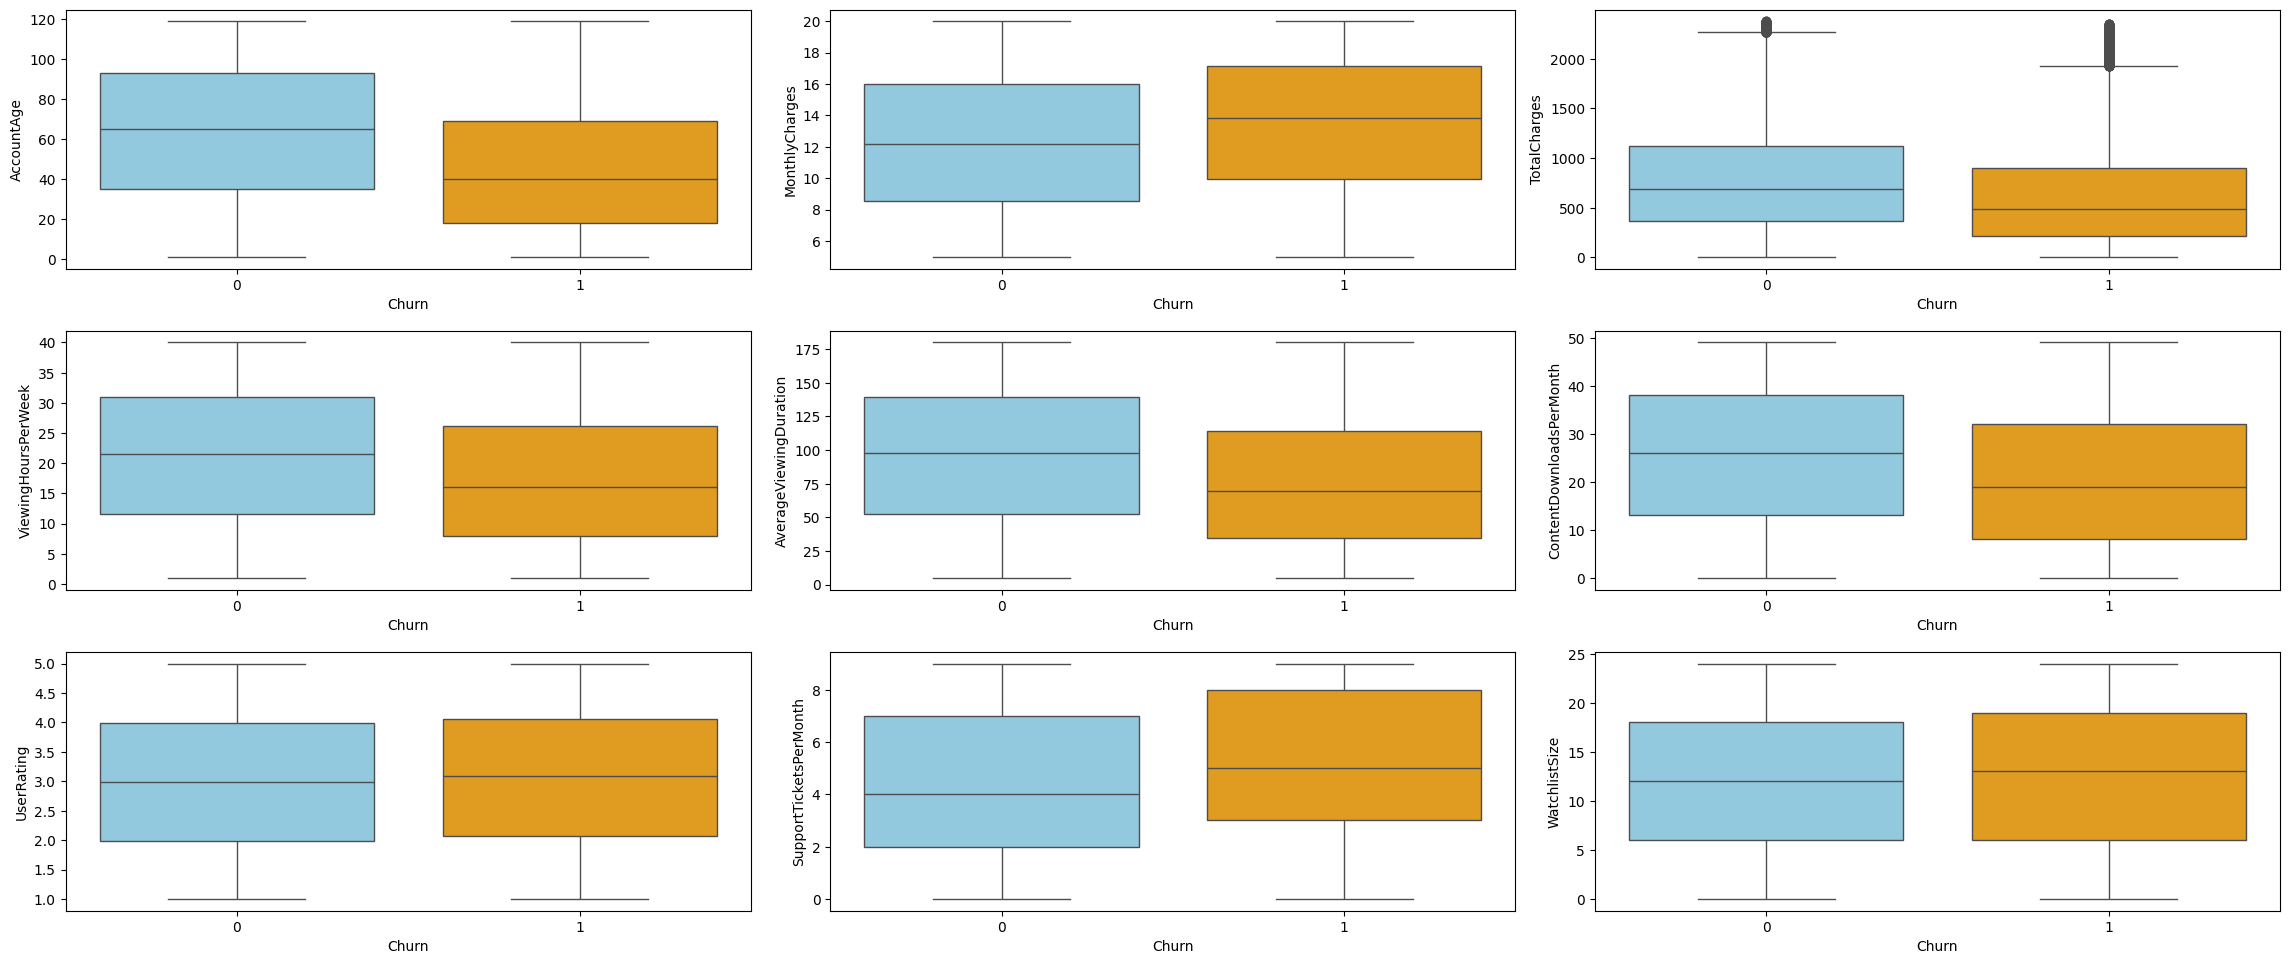

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(23, 35))
for i, col in enumerate(numeric_col, 1):
    plt.subplot(11, 3, i)
    # Create boxplot with hue for Churn
    sns.boxplot(x='Churn', y=col, data=train_df, palette={'0':'skyblue','1':'orange'})
    plt.ylabel(col)
    plt.xlabel("Churn")

plt.tight_layout()
plt.show()

Generates a histogram to visualize the distribution of a feature there're almost normal distibution except `"Total Charge"` is left skew**

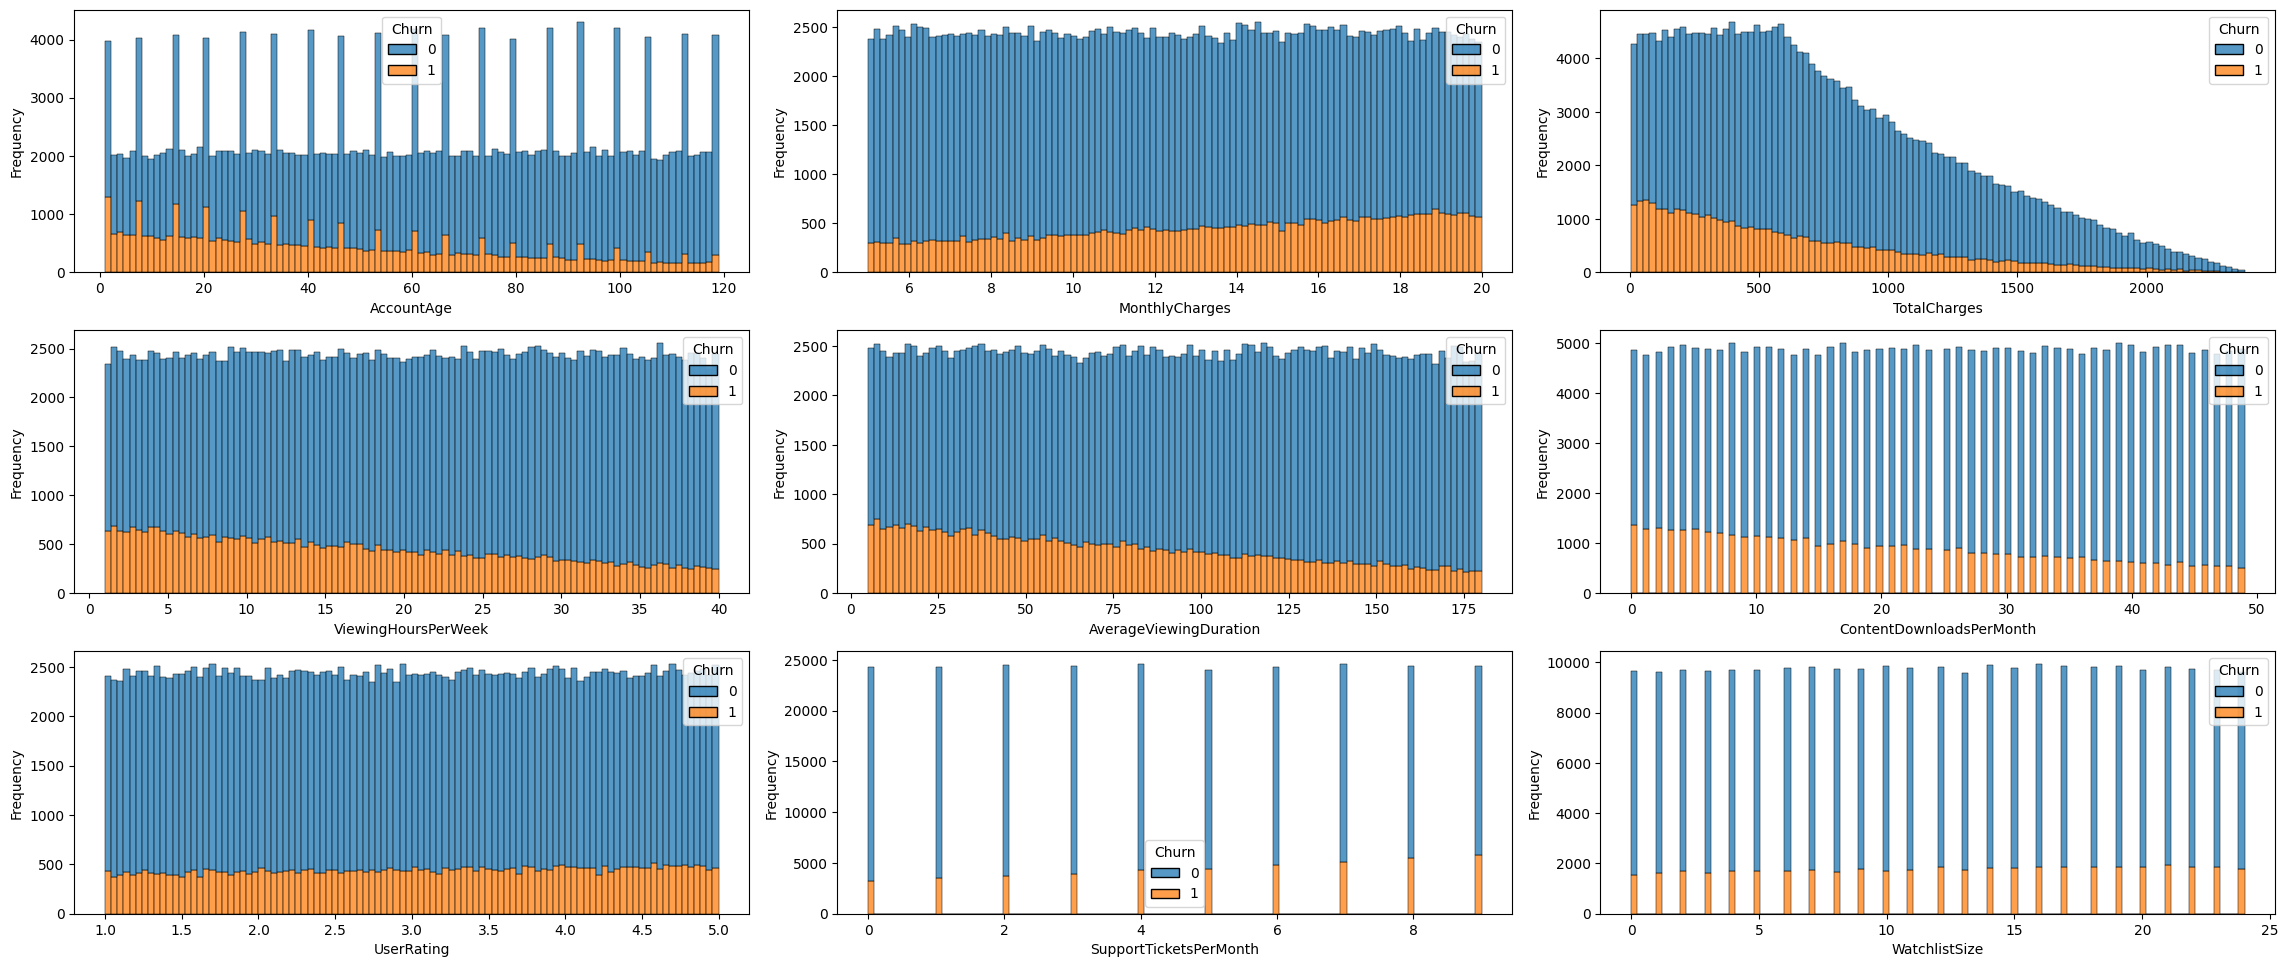

In [ ]:
plt.figure(figsize=(23, 35))
for i, col in enumerate(numeric_col, 1):
    plt.subplot(11, 3, i)
    # Create histogram with hue for Churn
    sns.histplot(data=train_df, x=col, hue='Churn', multiple='stack', bins=100)
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

#### *Proportion of Churned Customer*

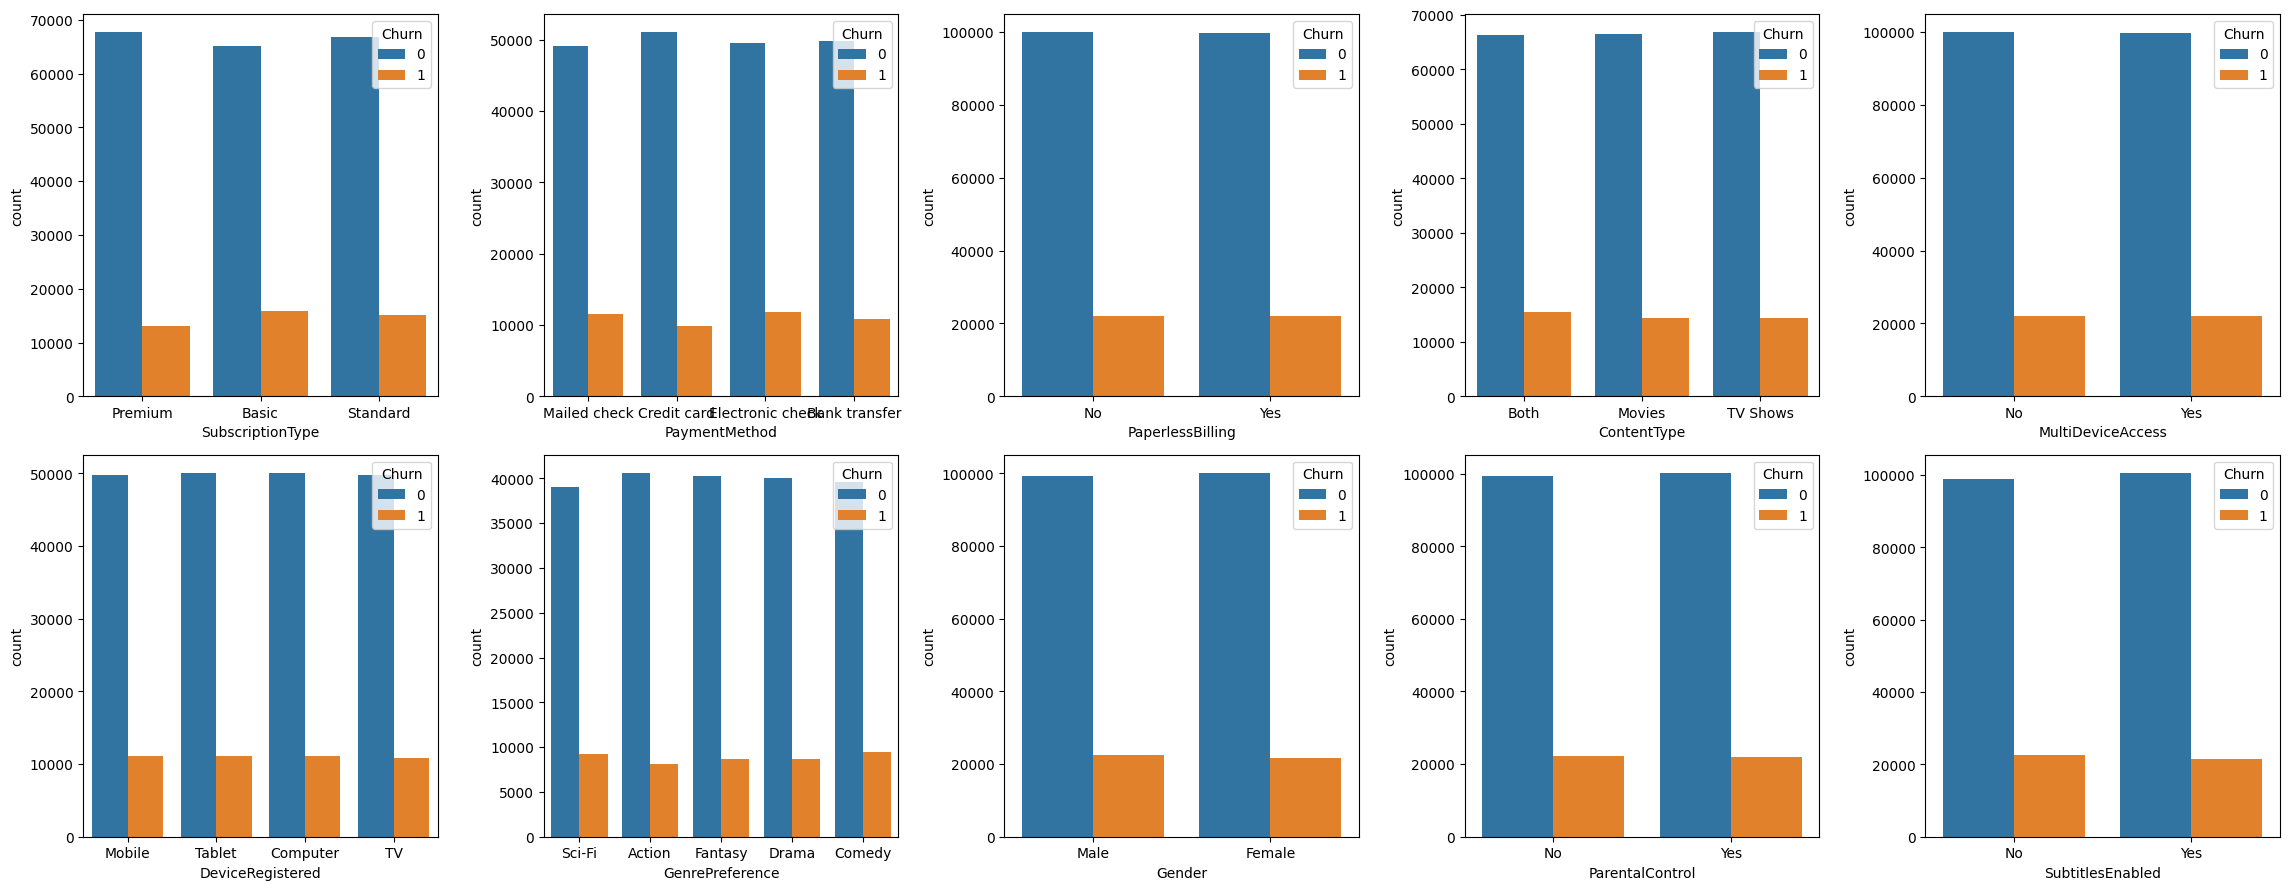

In [ ]:
plt.figure(figsize=(23,35))
for i, col in enumerate(category_col,1):
    plt.subplot(8,5,i)
    sns.countplot(x=col, hue='Churn', data=train_df)
plt.tight_layout()
plt.show()

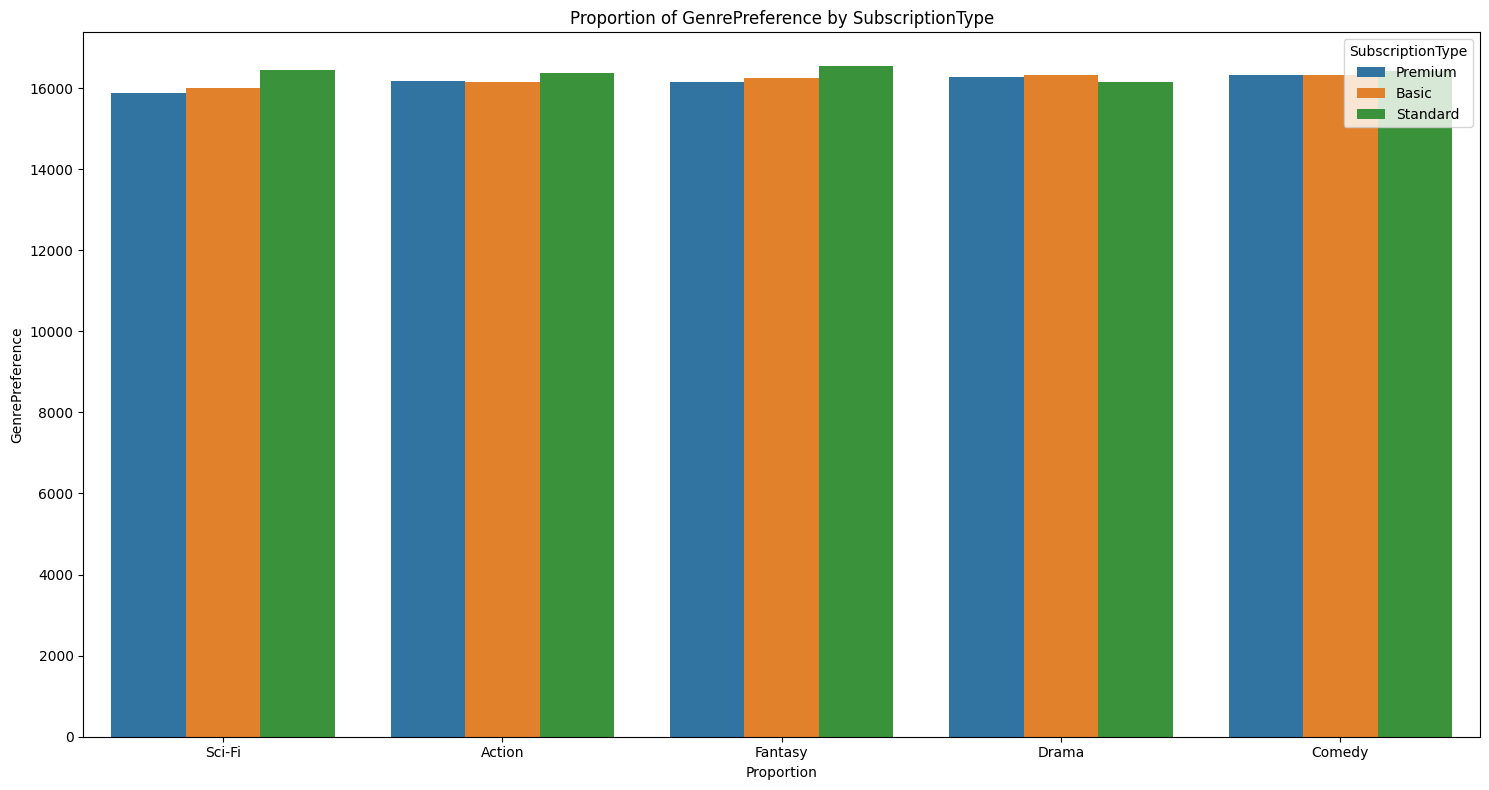

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(data=train_df, x='GenrePreference', hue='SubscriptionType')
plt.xlabel("Proportion")
plt.ylabel("GenrePreference")
plt.title("Proportion of GenrePreference by SubscriptionType")
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(20,25))
sns.pairplot(train_df, hue='Churn')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

The proportion of customer churn in each category is similar.

#### *Correration heatmap*

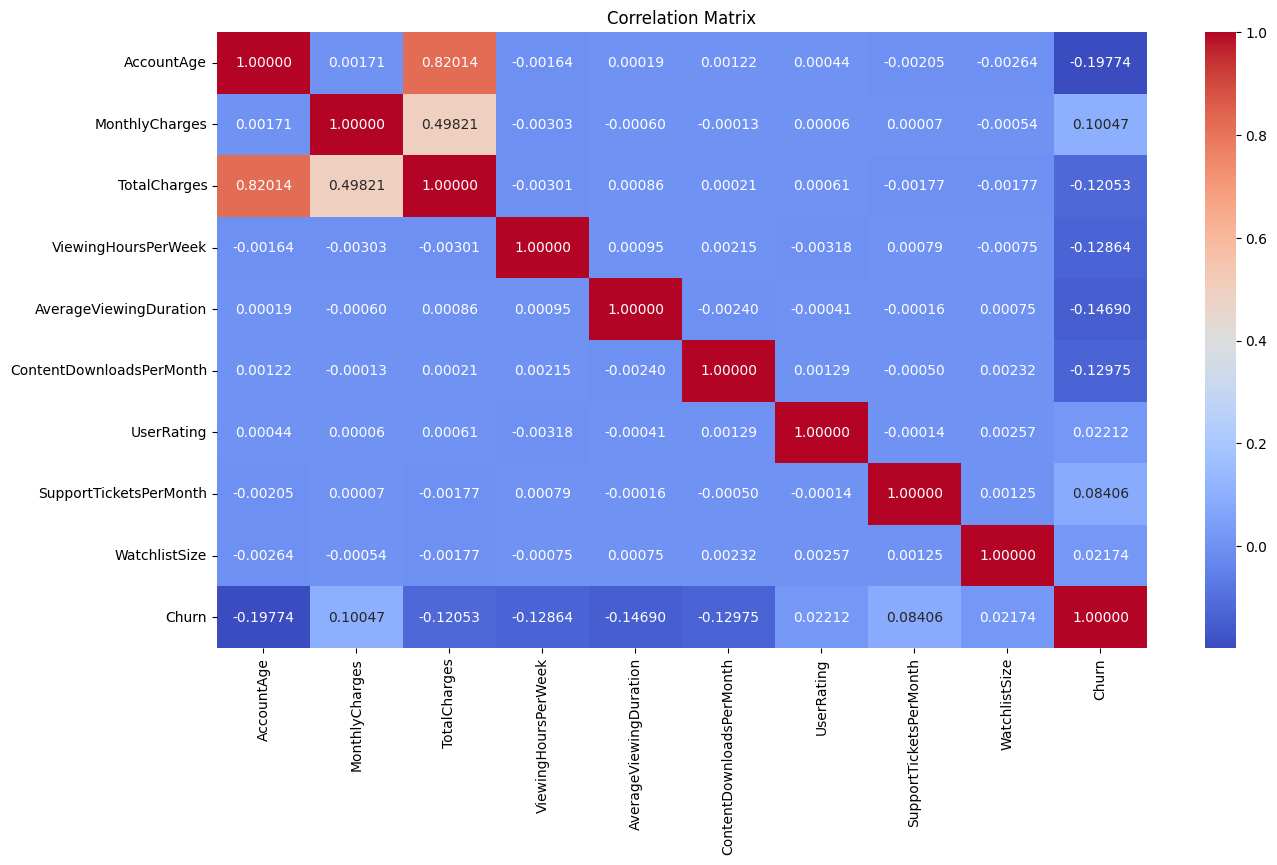

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(train_df[numeric_col+['Churn']].corr(), annot=True, cmap='coolwarm', fmt=".5f")
plt.title('Correlation Matrix')
plt.show()

`"Total Charge"` is also multicollinearity columns which highly correlation with `"AccountAge"` and `"MonthlyCharges"` so drop it!

In [8]:
#Drop Multicollinearity
train_df.drop(columns='TotalCharges',inplace=True)
numeric_col.remove('TotalCharges')
train_df.head()

,AccountAge,MonthlyCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,Churn
CustomerID,,,,,,,,,,,,,,,,,,,
CB6SXPNVZA,20,11.055215,Premium,Mailed check,No,Both,No,Mobile,36.758104,63.531377,10,Sci-Fi,2.176498,4,Male,3,No,No,0
S7R2G87O09,57,5.175208,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,25.725595,18,Action,3.478632,8,Male,23,No,Yes,0
EASDC20BDT,73,12.106657,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,57.364061,23,Fantasy,4.238824,6,Male,1,Yes,Yes,0
NPF69NT69N,32,7.263743,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,131.537507,30,Drama,4.276013,2,Male,24,Yes,Yes,0
4LGYPK7VOL,57,16.953078,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,45.356653,20,Comedy,3.616170,4,Female,0,No,No,0


## **Data Transformation**
--------------------------------------------------------------------------------

#### *Encoder and Standard Scaler*

In [9]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_col),
        ('cat', OneHotEncoder(sparse=False, drop='first'), category_col)]
)
# copy churn
train_churn = train_df['Churn'].copy()
train_df_processed = preprocessor.fit_transform(train_df.drop(columns='Churn'))
train_df = pd.DataFrame(train_df_processed,
                        columns=preprocessor.get_feature_names_out(),
                        index=train_df.index)
# split num__ and cat__
train_df.columns = [col[5:] for col in train_df.columns]
# put churn
train_df['Churn'] = train_churn


# Transform test data
test_df_processed = preprocessor.transform(test_df)
test_df = pd.DataFrame(test_df_processed,
                       columns=preprocessor.get_feature_names_out(),
                       index=test_df.index)
test_df.columns = [col[5:] for col in test_df.columns]

Convert data into a format suitable for analysis, including
*   `Standard Scaler` to normalization
*   `Onehot Encoder` to encoding categorical variables

## **Modeling**
--------------------------------------------------------------------------------



#### *Feature and Target Separation*

In [10]:
X = train_df.drop(columns = 'Churn', axis=1)
y = train_df['Churn']

#### *Selecting and Training XGBoost Model*

In [11]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=69, stratify = y)

model = XGBClassifier(random_state=69)
model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=69, ...)

  I prefer XGBoost (Extreme Gradient Boosting) is efficient machine learning algorithm based on gradient boosting particularly effective for classification

### *Classification Report*

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

model.fit(X_train, y_train)
y_pred = model.predict(X_val)
y_prob = model.predict_proba(X_val)[:, 1]

print(classification_report(y_val, y_pred))
print(f'ROC AUC Score: {roc_auc_score(y_val, model.predict_proba(X_val)[:,1])}')

              precision    recall  f1-score   support

           0       0.83      0.97      0.90     59882
           1       0.52      0.13      0.21     13255

    accuracy                           0.82     73137
   macro avg       0.68      0.55      0.55     73137
weighted avg       0.78      0.82      0.77     73137

ROC AUC Score: 0.736690829573277


### *Confusion Matrix*




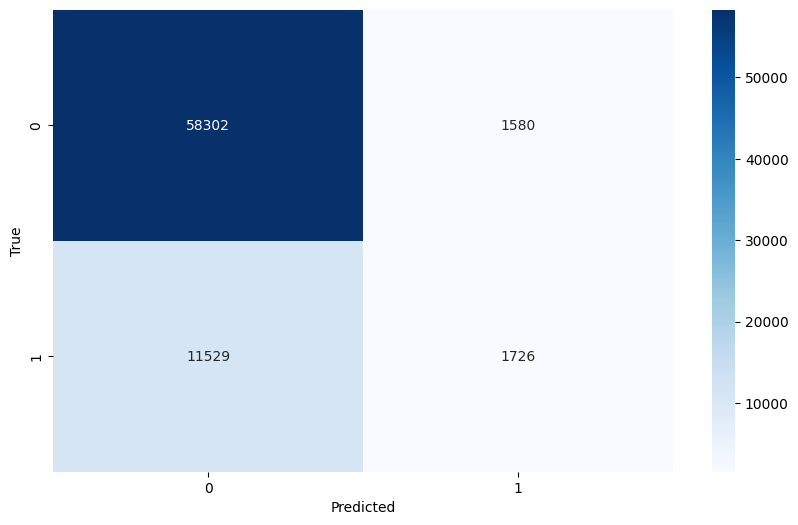

In [ ]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(10, 6))

cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### *Precision Recall Curve*

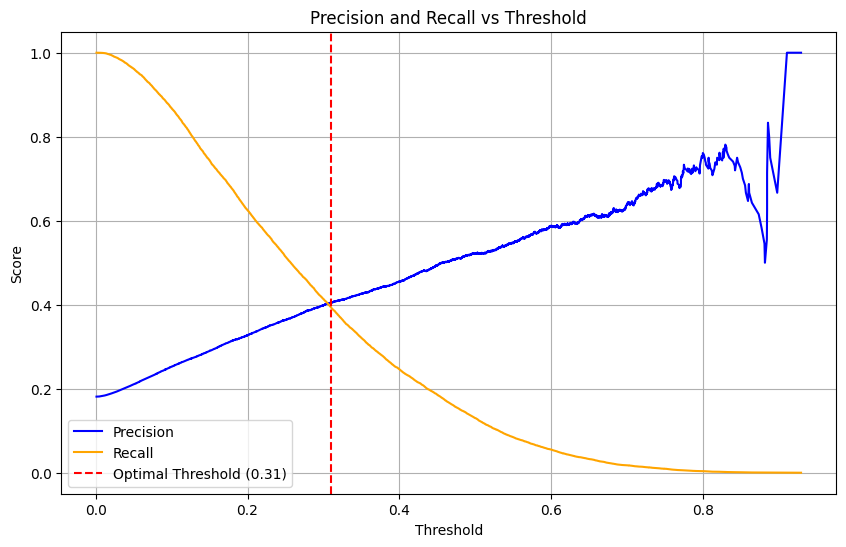

In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_val, y_prob)

optimal_threshold = 0.31
plt.figure(figsize=(10, 6))

# Precision
plt.plot(thresholds, precision[:-1], label='Precision', color='blue')

# Recall
plt.plot(thresholds, recall[:-1], label='Recall', color='orange')

# Threshold
plt.axvline(x=optimal_threshold, color='red', linestyle='--', label=f'Optimal Threshold ({optimal_threshold:.2f})')

plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs Threshold')
plt.legend(loc='best')
plt.grid(True)
plt.show()

### *Roc Curve*

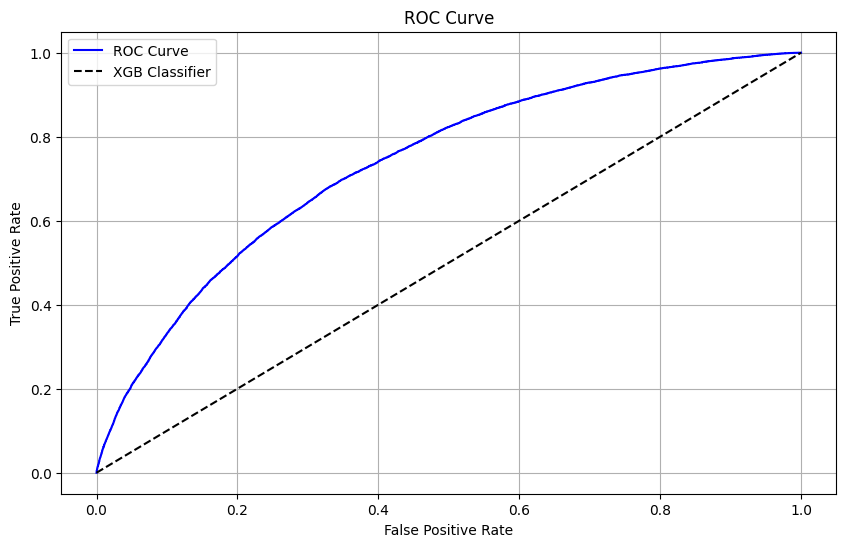

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, roc_thresholds = roc_curve(y_val, y_prob)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC Curve', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.grid(True)

plt.plot([0, 1], [0, 1], 'k--', label='XGB Classifier')
plt.legend(loc='best')
plt.show()

### *Feature Importance*

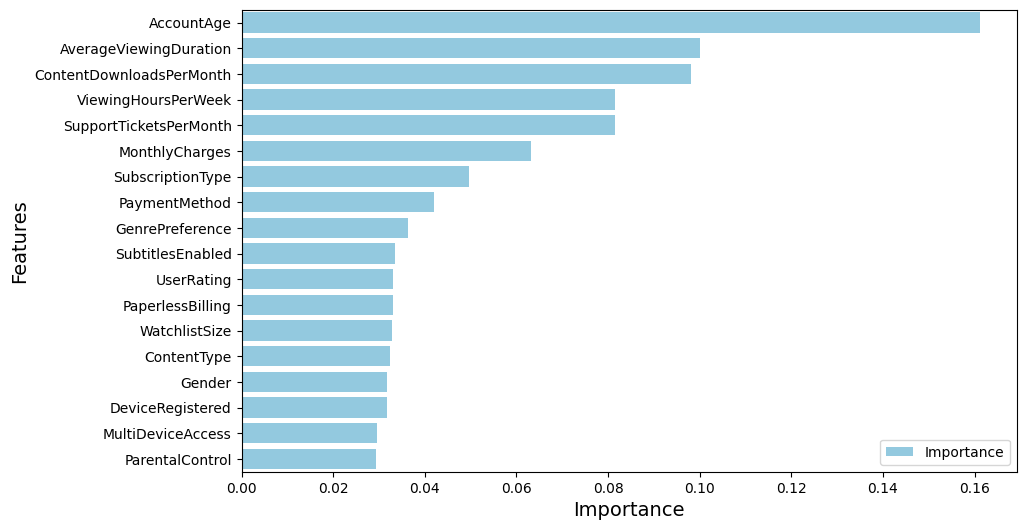

In [ ]:
feature_importances = model.feature_importances_

features_df = pd.DataFrame({"Features": X.columns, "Importance": feature_importances})
features_df = features_df.sort_values(by="Importance", ascending=False)

# Create a figure with one Axes
plt.figure(figsize=(10, 6))

# Bar plot for Importance
sns.barplot(x="Importance", y="Features", data=features_df, color='skyblue', label='Importance')

plt.xlabel("Importance", fontsize=14)
plt.ylabel("Features", fontsize=14)

plt.show()

## **Model Improvement**

#### *Handling with Imbalanced Data*

Calculate class weights for imbalanced datasets. Class weights are important in machine learning, particularly in classification

In [24]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', classes=[0,1], y=y_train)
class_weight_dict = dict(zip([0,1], class_weights))

print("Class weights:", class_weight_dict)

Class weights: {0: 0.6106725449639644, 1: 2.7589161574029166}


#### *Hyperparameter Tuning and Cross Validation*

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

models = [
    ('XGBoost', XGBClassifier(random_state=69, tree_method='gpu_hist', device='gpu', scale_pos_weight=class_weights[1]), {
        'n_estimators': [300, 400, 500],
        'learning_rate': [0.01, 0.03, 0.05],
        'max_depth': [3, 5, 7]
    }),
    ('Random Forest', RandomForestClassifier(random_state=69, class_weight=class_weight_dict), {
        'n_estimators': [300, 400, 500],
        'max_depth': [10, 20, 30],
        'min_samples_split': [2, 5, 10]
    }),
    ('Logistic Regression', LogisticRegression(random_state=69, class_weight=class_weight_dict), {
        'C': [0.01, 0.1, 1, 10],
        'solver': ['lbfgs', 'saga']
    })
]

stratified_kfold = StratifiedKFold(n_splits=4, shuffle=True, random_state=69)

for name, model, param_grid in models:
    grid_search = GridSearchCV(
        model, param_grid, n_jobs=-1, cv=stratified_kfold, verbose=False, scoring='roc_auc'
        )
    grid_search.fit(X_train, y_train)
    print(f"Best parameters for {name}:")
    print(grid_search.best_params_)
    print(f"Best cross-validation ROC AUC: {grid_search.best_score_:.4f}")

    best_model = grid_search.best_estimator_

    y_pred = best_model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    report = classification_report(y_val, y_pred)

    print(f"Test Accuracy: {accuracy:.4f}")
    print(f"Classification Report for {name}:\n{report}\n")

Best parameters for XGBoost:
{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 400}
Best cross-validation ROC AUC: 0.7461
Test Accuracy: 0.7706
Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.88      0.83      0.86     59882
           1       0.39      0.49      0.44     13255

    accuracy                           0.77     73137
   macro avg       0.64      0.66      0.65     73137
weighted avg       0.79      0.77      0.78     73137


Best parameters for Random Forest:
{'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 500}
Best cross-validation ROC AUC: 0.7422
Test Accuracy: 0.6990
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.90      0.71      0.79     59882
           1       0.33      0.65      0.44     13255

    accuracy                           0.70     73137
   macro avg       0.62      0.68      0.62     73137
weighted avg   

#### *Implementing Ensemble Model*

##### *Stacking Classifier*

In [ ]:
# Define base models
base_models = [
    ('XGBoost', XGBClassifier(learning_rate=0.05, max_depth = 3, n_estimators=400, random_state=69, tree_method='gpu_hist', device='gpu', scale_pos_weight=class_weights[1])),
    ('Random Forest', RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=500, random_state=69, class_weight=class_weight_dict)),
    ('Logistic Regression', LogisticRegression(C=0.1, solver='lbfgs', random_state=69, class_weight=class_weight_dict))
    ]

In [ ]:
from sklearn.ensemble import StackingClassifier

# Define meta-model
meta_model = LogisticRegression(random_state=69)

# Define stacking model
stacking_model = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=StratifiedKFold(n_splits=4, shuffle=True, random_state=69)
)

stacking_model.fit(X_train, y_train)

# Predict
y_pred_stack = stacking_model.predict(X_val)
y_prob_stack = stacking_model.predict_proba(X_val)[:, 1]
accuracy = accuracy_score(y_val, y_pred_stack)
report = classification_report(y_val, y_pred_stack)
roc_auc = roc_auc_score(y_val, y_prob_stack)

print(f"Test Accuracy: {accuracy:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"Classification Report for Stacking Model:\n{report}\n")

Test Accuracy: 0.8246
ROC AUC: 0.7530
Classification Report for Stacking Model:
              precision    recall  f1-score   support

           0       0.83      0.98      0.90     59882
           1       0.59      0.11      0.18     13255

    accuracy                           0.82     73137
   macro avg       0.71      0.55      0.54     73137
weighted avg       0.79      0.82      0.77     73137




##### *Voting Classifier*


In [ ]:
from sklearn.ensemble import VotingClassifier

voting_model = VotingClassifier(
    estimators=base_models,
    voting='soft'
)
voting_model.fit(X_train, y_train)

y_pred_voting = voting_model.predict(X_val)
y_prob_voting = voting_model.predict_proba(X_val)[:, 1]
accuracy = accuracy_score(y_val, y_pred_voting)
report = classification_report(y_val, y_pred_voting)
roc_auc = roc_auc_score(y_val, y_prob_voting)

print(f"Test Accuracy: {accuracy:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"Classification Report for Stacking Model:\n{report}\n")

Test Accuracy: 0.7227
ROC AUC: 0.7519
Classification Report for Stacking Model:
              precision    recall  f1-score   support

           0       0.90      0.75      0.82     59882
           1       0.35      0.61      0.44     13255

    accuracy                           0.72     73137
   macro avg       0.62      0.68      0.63     73137
weighted avg       0.80      0.72      0.75     73137




#### *Compair with Keras*

In [25]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.metrics import AUC
from tensorflow.keras.callbacks import EarlyStopping

neural_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
neural_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=[AUC(name='auc')])

early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

history = neural_model.fit(X_train,
                    y_train,
                    epochs=100,
                    batch_size=32,
                    validation_data=(X_val, y_val),
                    class_weight=class_weight_dict,
                    callbacks=[early_stopping],
                    verbose=0)

# Deep Learning Classifier
y_pred_prob = neural_model.predict(X_val)
y_pred_neu = (y_pred_prob > 0.5).astype(int)
accuracy_neu = accuracy_score(y_val, y_pred_neu)
roc_score_neu = roc_auc_score(y_val, y_pred_prob)
report_neu = classification_report(y_val, y_pred_neu)

print(f'Deep Learning Classification Report:\n{report_neu}')
print(f"Test Accuracy: {accuracy_neu:.4f}")
print(f'ROC AUC Score: {roc_score_neu:.4f}')

2286/2286 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
Deep Learning Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.70      0.79     59882
           1       0.33      0.67      0.44     13255

    accuracy                           0.69     73137
   macro avg       0.62      0.69      0.62     73137
weighted avg       0.80      0.69      0.73     73137

Test Accuracy: 0.6949
ROC AUC Score: 0.7515


## **Model Evaluation**

In [ ]:
y_pred_stack = stacking_model.predict(X_val)
y_prob_stack = stacking_model.predict_proba(X_val)[:, 1]
accuracy = accuracy_score(y_val, y_pred_stack)
report = classification_report(y_val, y_pred_stack)
roc_auc = roc_auc_score(y_val, y_prob_stack)

stacking_model

StackingClassifier(cv=StratifiedKFold(n_splits=4, random_state=69, shuffle=True),
                   estimators=[('XGBoost',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device='gpu',
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              grow_policy...
                                              random_state=69, ...)),
                               ('Random Forest',
                                RandomForestClassifier(class_weight={0: 0.6106725449639644,
                                                                     1: 2.7589161574029166},
                                                       max_depth=10,
                                                       min_samples_split=10,
                                                       n_estimators=400,
                                                       random_state=69)),
                               ('Logistic Regression',
                                LogisticRegression(C=0.1,
                                                   class_weight={0: 0.6106725449639644,
                                                                 1: 2.7589161574029166},
                                                   random_state=69))],
                   final_estimator=LogisticRegression(random_state=69))

#### *Confusion Matrix*

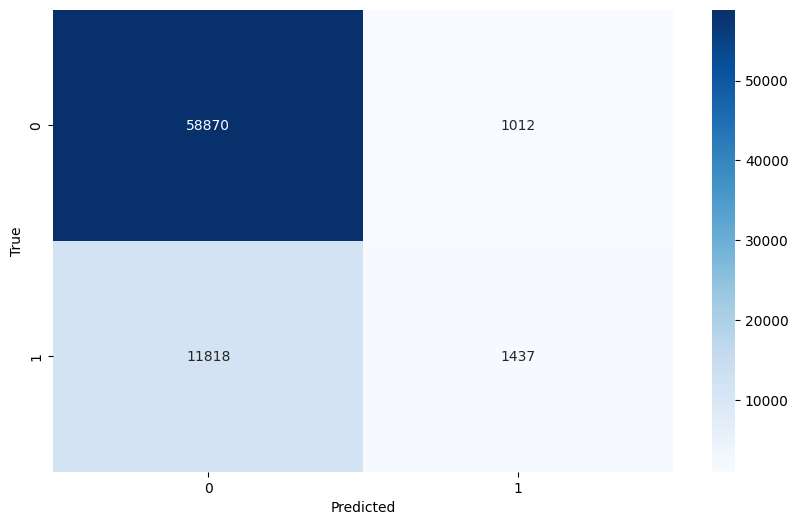

In [16]:
plt.figure(figsize=(10, 6))

cm = confusion_matrix(y_val, y_pred_stack)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#### *Precission Recall Curve*

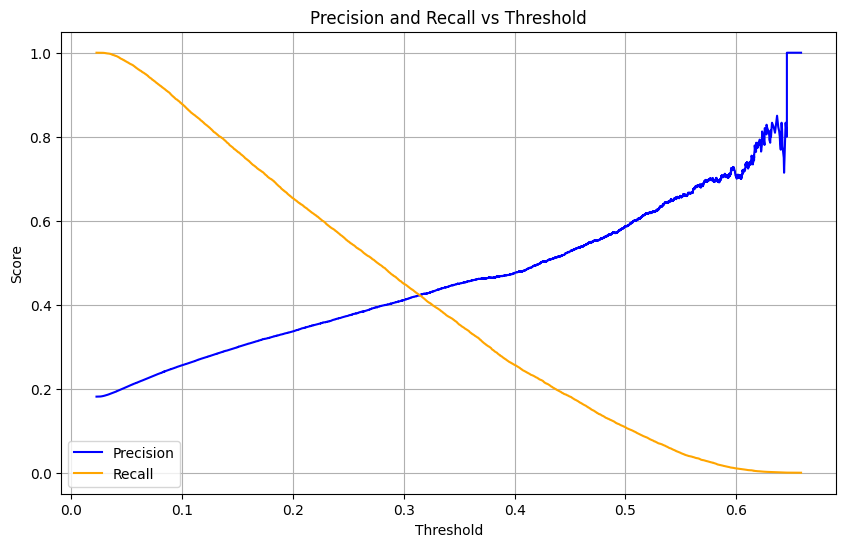

In [17]:
precision, recall, thresholds = precision_recall_curve(y_val, y_prob_stack)

plt.figure(figsize=(10, 6))
# Precision
plt.plot(thresholds, precision[:-1], label='Precision', color='blue')
# Recall
plt.plot(thresholds, recall[:-1], label='Recall', color='orange')

plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs Threshold')
plt.legend(loc='best')
plt.grid(True)
plt.show()

#### *ROC Curve*

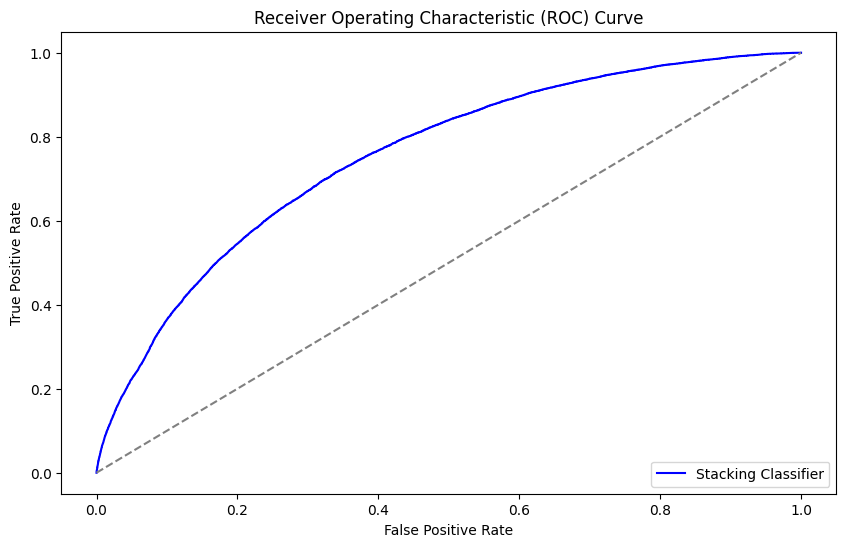

In [18]:
# Compute ROC curve for another_model
fpr, tpr, _ = roc_curve(y_val, y_prob_stack)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='Stacking Classifier')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### *Shap*

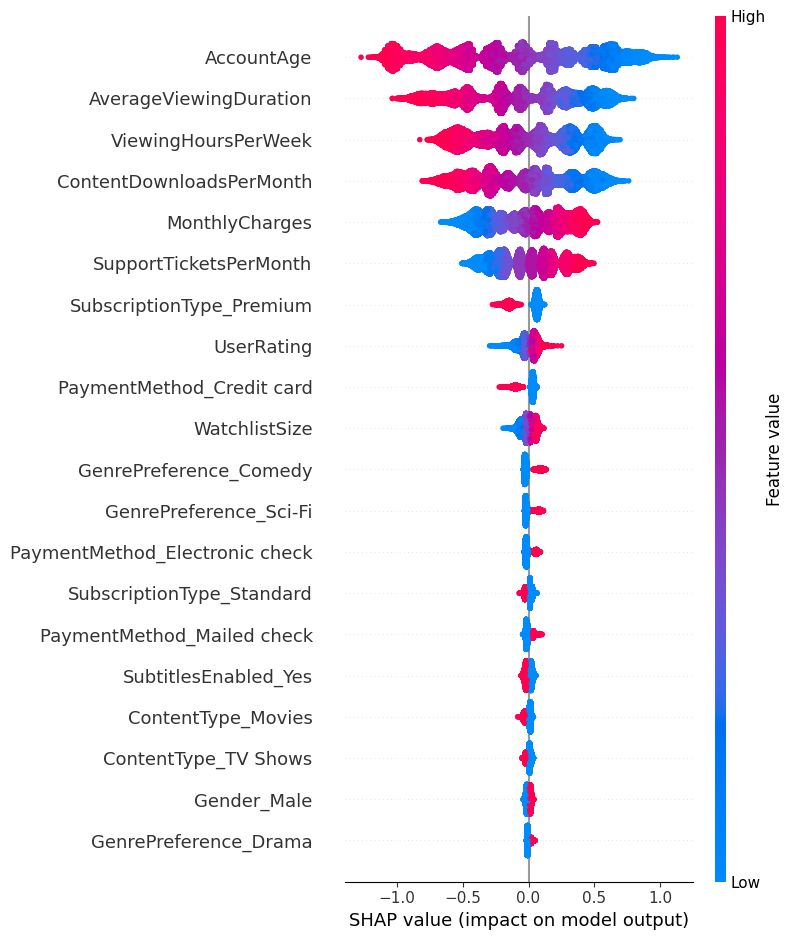

In [ ]:
import shap

# SHAP for XGBoost
explainer_xgb = shap.Explainer(stacking_model.named_estimators_['XGBoost'])
shap_values_xgb = explainer_xgb(X_val)

# Plot SHAP summary for XGBoost
shap.summary_plot(shap_values_xgb, X_val)

## **Make Predictions**

Remember you should create a dataframe named `prediction_df` with exactly 104,480 entries plus a header row attempting to predict the likelihood of churn for subscriptions in `test_df`. Your submission will throw an error if you have extra columns (beyond `CustomerID` and `predicted_probaility`) or extra rows.

The file should have exactly 2 columns:
`CustomerID` (sorted in any order)
`predicted_probability` (contains your numeric predicted probabilities between 0 and 1, e.g. from `estimator.predict_proba(X, y)[:, 1]`)

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `CustomerID` and `predicted_probability`!

In [ ]:
import joblib
model_path = '/content/drive/MyDrive/Colab Notebooks/Churn Prediction/stacking_model.pkl'
joblib.dump(stacking_model, model_path)

In [12]:
import joblib
stacking_model = joblib.load('/content/drive/MyDrive/Colab Notebooks/Churn Prediction/stacking_model.pkl')

In [13]:
churn_proba = stacking_model.predict_proba(test_df)[:,1]

In [14]:
prediction_df = pd.DataFrame({'CustomerID': test_df.index, 'predicted_probability': churn_proba})
prediction_df

,CustomerID,predicted_probability
0,O1W6BHP6RM,0.098978
1,LFR4X92X8H,0.044332
2,QM5GBIYODA,0.410523
3,D9RXTK2K9F,0.046173
4,ENTCCHR1LR,0.130103
...,...,...
104475,UTKREC613O,0.078998
104476,MDB4E477PS,0.095521
104477,IPDIA02ZE1,0.098403
104478,ITLFTPRJGV,0.264541


### Example prediction submission:

The code below is a very naive prediction method that simply predicts churn using a Dummy Classifier. This is used as just an example showing the submission format required. Please change/alter/delete this code below and create your own improved prediction methods for generating `prediction_df`.

## Final Tests - **IMPORTANT** - the cells below must be run prior to submission

Below are some tests to ensure your submission is in the correct format for autograding. The autograding process accepts a csv `prediction_submission.csv` which we will generate from our `prediction_df` below. Please run the tests below an ensure no assertion errors are thrown.

In [19]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

# Writing to csv for autograding purposes
prediction_df.to_csv("prediction_submission.csv", index=False)
submission = pd.read_csv("prediction_submission.csv")

assert isinstance(submission, pd.DataFrame), 'You should have a dataframe named prediction_df.'

In [20]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.columns[0] == 'CustomerID', 'The first column name should be CustomerID.'
assert submission.columns[1] == 'predicted_probability', 'The second column name should be predicted_probability.'

In [21]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[0] == 104480, 'The dataframe prediction_df should have 104480 rows.'

In [22]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[1] == 2, 'The dataframe prediction_df should have 2 columns.'

In [ ]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

## This cell calculates the auc score and is hidden. Submit Assignment to see AUC score.